In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as pt

In [2]:
train=pd.read_csv('/home/atul/Downloads/train.csv')
test=pd.read_csv('/home/atul/Downloads/test1.csv')

In [3]:
train.head() #1st 5 rows of train

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


In [4]:
test.head() #1st 5 rows of test

,AT,V,AP,RH,PE
0,8.67,40.77,1011.81,89.40,479.23
1,10.53,37.50,1008.55,99.91,472.32
2,7.99,41.38,1021.95,78.77,487.57
3,22.29,45.01,1012.40,51.58,449.08
4,9.06,36.30,1015.14,58.71,477.38


# Algorithms

error_thres = Error Threshold  
maxi = max. no. of iterations   
s = step size or learning rate  
theta = parameter array(to learn) ,here Initialized with all zeros; can be random values as well between 0 and 1  
J = cost Function    
Jval = list of error values  
m = no. of training examples  
Y = Dependent/Predicted Variable  

In [5]:
def gradientDescent(A,B,theta,Y,s):
        t=s/len(A)
        #theta=theta-(t*(((theta.T.dot(A))-B).dot(A.T)).T)
        theta=theta-(t*((Y-B.T).dot(A.T)))
        #thetaval.append(theta)
        return(theta)

In [6]:
def polyRegression(poly_x,error_thres,maxi,s):
    Jval=[]
    theta=np.matrix([np.zeros(15)]) 
    for i in range(maxi):
        Y=theta.dot(poly_x)
        J=(((1/(2*len(Y)))*np.sum(np.square(Y-yTrainTrue))))
        Jval.append(J)
        if(J<error_thres or (len(Jval)>10 and np.mean(Jval[-10:])==Jval[-1])):
            break
        else:
            theta=gradientDescent(poly_x,yTrainTrue,theta,Y,s)
    return(theta,Jval)

In [7]:
def polyTransform(degree,X):
    poly=PolynomialFeatures(degree) 
    poly_x=poly.fit_transform(X)
    return poly_x

# Training

### Preparing Train Data

In [8]:
Xtrain=train.iloc[:,0:4]
Xtrain.shape

(299, 4)

In [9]:
yTrainTrue = train.iloc[:,-1:] #true y in train
yTrainTrue.shape

(299, 1)

#### Converting to Polynomial features

In [10]:
poly_xtrain= polyTransform(2,Xtrain) #degree=2
poly_xtrain.shape

(299, 15)

In [11]:
theta,Jval = polyRegression(poly_xtrain.T,0.001,1000,0.000000000000001) 
theta #learnt Parameter values

matrix([[ 4.22012390e-10, -1.22542751e-08, -1.01054229e-08,
          4.30717832e-07,  4.85388111e-08, -5.92987880e-07,
         -1.26596150e-06, -1.23547754e-05, -5.49326964e-07,
         -2.30283915e-06, -1.00519239e-05,  2.20489471e-07,
          4.39610427e-04,  4.94056913e-05,  4.80769810e-06]])

Text(0, 0.5, 'Error or Cost Function')

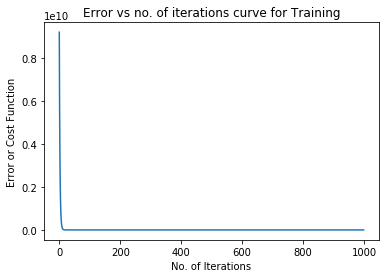

In [12]:
pt.plot(range(len(Jval)),Jval)
pt.title('Error vs no. of iterations curve for Training')
pt.xlabel('No. of Iterations')
pt.ylabel('Error or Cost Function')

### Predicted Values on Train

In [13]:
yPredTrain = theta.dot(poly_xtrain.T)
yPredTrain

matrix([[453.20512172, 452.52527496, 447.05722301, 449.08390132,
         459.16258608, 457.53724682, 449.62061625, 462.52063193,
         449.40340853, 459.03248731, 447.65931115, 453.85444936,
         451.27515434, 451.14551958, 457.28381475, 460.49909956,
         452.65510834, 461.5314989 , 459.31288219, 442.59481139,
         456.17820896, 445.28553518, 451.98825051, 465.05163827,
         459.82490987, 465.83507046, 452.72359607, 459.90574874,
         452.32517345, 454.925276  , 438.66762136, 453.95002867,
         461.37636249, 454.25507088, 448.26021371, 463.45335952,
         448.42743639, 457.84011046, 459.03129686, 457.6541807 ,
         447.15836849, 450.47320836, 455.68236949, 454.28951802,
         455.55698837, 450.53590978, 447.37726115, 444.31395824,
         457.58080846, 450.02856128, 453.43315933, 452.90940269,
         458.04755256, 445.85592759, 449.8322355 , 448.88599692,
         450.89998143, 452.65469481, 455.25859111, 445.08848913,
         451.21924894, 45

#### Root Mean Squared Error for Train

In [14]:
np.sqrt(mean_squared_error(yTrainTrue,yPredTrain.T))

14.828363012811334

# Testing

## Preparing Test Data

In [15]:
Xtest=test.iloc[:,0:4]
Xtest.shape

(200, 4)

#### True Target Values of test

In [16]:
yTestTrue = test.iloc[:,-1:]
yTestTrue

,PE
0,479.23
1,472.32
2,487.57
3,449.08
4,477.38
5,474.16
6,454.25
7,429.85
8,462.98
9,434.04


### Converting to polynomial 

In [17]:
poly_xtest=polyTransform(2,Xtest)
poly_xtest.shape

(200, 15)

### Applying Learned theta values from Trained model on test data to predict values on Test

In [18]:
yPredTest = theta.dot(poly_xtest.T)
yPredTest

matrix([[454.03625689, 451.67172335, 462.5985258 , 452.43033375,
         455.49677233, 454.11570564, 452.62492004, 445.99084685,
         459.10795525, 450.42207148, 458.4551422 , 467.47290904,
         461.45255556, 454.35685273, 457.79502677, 464.95761126,
         447.92414616, 457.10163514, 452.208684  , 460.81340397,
         446.88469503, 453.59813974, 453.49372864, 449.29660824,
         446.43497091, 449.27448928, 451.75163854, 453.10054712,
         446.06647575, 453.53324988, 455.36750109, 460.63741177,
         458.83609955, 454.48821433, 456.78295532, 462.30474797,
         449.32615955, 453.85622483, 462.06377668, 461.42248457,
         460.84759782, 448.19213054, 441.14072412, 464.30863309,
         450.76076164, 460.50561744, 459.20213525, 448.00029451,
         454.09226851, 452.92656869, 454.91258057, 448.98863877,
         449.16569641, 447.2001665 , 469.95268606, 459.93835535,
         450.93315986, 449.4436547 , 452.93659534, 454.42718114,
         461.09363176, 45

### Root Mean Squared Error for Test

In [19]:
np.sqrt(mean_squared_error(yTestTrue,yPredTest.T))

14.24398367587939